# Phase 2 DS3000 Project

## Group Members: Anya Wild, Janina Kurowski, Michael Hrinda, Elana von der Heyden

### Project Phase 2

In recent years, wildfires have spread throughout Europe, ravaging cities, homes, and land:

[Hundreds of firefighters battle a deadly forest fire raging in southern Greece for the third day (AP News)](https://apnews.com/article/greece-wildfire-peloponnese-forest-cfeb415e491edbdce660490bae5aeb3f)

[Europe's wildfires in 2023 were among the worst this century, report says (Reuters)](https://www.reuters.com/world/europe/europes-wildfires-2023-were-among-worst-this-century-report-says-2024-04-10/)

 These fires post an economic, health, and safety threat to families and individuals, and are likely an indicator of increasing global temperatures and underlying climate change.

NASA's [Fire Information for Resource Management System (FIRMS)](https://firms.modaps.eosdis.nasa.gov/) utilizes Visible Infrared Imaging Radiometer Suite (VIIRS) 375m imaging to capture fires real-time worldwide, and the data is published for public access via an API. Although there are other sensors that NASA uses concurrently, we posit the VIIRS software is the most accurate and up-to-date, and would thus service us best for this project:

![Comparison of daily fire spread mapped by 1km Aqua/MODIS (left), 750m VIIRS (center) and 375m VIIRS (right) data](https://www.earthdata.nasa.gov/s3fs-public/imported/Brazil_MODIS_VIIRS_1.jpg?VersionId=GCOBEkFW7SVYsKIwwssJrV_MtjTopKdn)

Pictured above is a comparison of daily fire spread mapped by 1km Aqua/MODIS (left), 750m VIIRS (center) and 375m VIIRS (right) data. As shown, the 375m VIIRS data provides the most detailed image and coherent fire spread compared to MODIS and 750m VIIRS imaging. Therefore, we shall focus on 375m VIIRS imaging for the scope of this project.

Using longitudinal/latitudinal features, as well as other features of the data published via the API, we aspire to predict where new wildfires may propagate using machine learning techniques.


The data contains the following features:

- longitude (numeric)
- latitude (numeric)
- brightness (numeric) - represents the intensity of the fire (higher brightness corresponds to a more intense fire)
- confidence (numeric) - represents the confidence for a pixel from the images accurately detecting an active fire
- scan (numeric) - represents the approximate size of the imaged fire
- satellite (categorical) (either collected via Aqua or Terra satellite)
- acq_date and acq_time (date & time) - could be useful for understanding wildfire detection throughout the year and how trends might change seasonally


### Interesting questions may include:
- Where are wildfires most likely to occur? Is there one area that wildfires tend to cluster in occurence?
- Would it be possible to predict approximate wildfire locations based on certain features of the data, such as scan, longitude, latitude, and brightness?
- Is either the Terra or Aqua satellite more accurate in capturing wildfire location based on confidence rating?
- Are wildfires more common during certain times of the year? can we predict wildfire location and severity based on the time of year?

### Possible ML uses:
For exploring the questions above, there are a couple of different ML concepts that may be applicable. For understanding wildfire 'hotspots', K-means clustering could possibly be used to help identify patterns in the data points. Time series analysis could be used for understanding and predicting the seasonality of wildfires. Regression could also be used to understand if geographical location / territory affects fire intensity (brightness) and whether that could be used to predict fire intensity. 

### Data Collection:

In [9]:
# imports and API key

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

key = '996b2af0b72c07a0264d19e7d07e2bd5'

In [2]:
# takes ~3 min to run

"""
# list of European countries to get available data
euro_c = ['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA',
 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL',
 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']

"""

# fetching data solely for Austria for Phase II visualization purposes
# will use all available European countries for future phases
euro_c = ['AUT']

# initial df
euro_c_df = pd.DataFrame()

# loop through European countries
for country in euro_c:

    # loop through: 2014, 2018, 2022 for first of March, June, September, December
    for year in ['2014', '2016', '2018', '2020', '2022']:
        for month in ['03','06','09','12']:

            # format date and url
            date = year + '-' + month + '-01'
            url = f'https://firms.modaps.eosdis.nasa.gov/api/country/csv/{key}/VIIRS_NOAA20_NRT/{country}/1/{date}'

            # add to overall df if no error is produced and the sub df is not empty
            try:
                country_data = pd.read_csv(url)
                if country_data.empty:
                    continue
                euro_c_df = pd.concat([euro_c_df, country_data], ignore_index=True)

            except:
                # print any countries and dates with errors
                print(country + ' ' + date)


### Data Cleaning:

In [4]:
# check for empty values
print(euro_c_df.isnull().values.any())

# drop columns that contain the same data for all rows (satellite, instrument, confidence, version)
euro_c_df_cleaned = euro_c_df[
    ['country_id', 'latitude','longitude','bright_ti4','bright_ti5','scan','track','acq_date','acq_time','frp','daynight']]
euro_c_df_cleaned

False


,country_id,latitude,longitude,bright_ti4,bright_ti5,scan,track,acq_date,acq_time,frp,daynight
0,AUT,47.34311,9.62378,328.50,290.20,0.53,0.42,2020-03-01,1230,4.40,D
1,AUT,47.54527,9.78854,331.00,287.00,0.54,0.42,2020-03-01,1230,5.00,D
2,AUT,47.54559,9.78841,329.30,286.50,0.54,0.42,2020-03-01,1230,3.70,D
3,AUT,48.27758,14.34202,331.80,276.30,0.59,0.53,2020-03-01,1230,3.80,D
4,AUT,48.27502,14.33618,300.40,279.20,0.58,0.70,2020-06-01,218,1.90,N
5,AUT,48.27231,14.33804,338.70,308.00,0.48,0.40,2020-06-01,1206,8.50,D
6,AUT,48.27595,14.33717,344.40,301.70,0.48,0.40,2020-06-01,1206,8.50,D
7,AUT,48.28156,14.32667,334.10,297.80,0.48,0.40,2020-06-01,1206,3.40,D
8,AUT,48.28253,14.32903,335.90,299.00,0.48,0.40,2020-06-01,1206,5.10,D
9,AUT,48.26442,14.33486,296.90,269.30,0.40,0.60,2020-12-01,6,2.20,N


### Visual 1:

Question: Would it be possible to predict approximate wildfire locations based on certain features of the data, such as scan, longitude, latitude, and brightness?

This visual will show which features are most strongly correlated with one another, highlighting any potential relationships between geographic and fire-specific variables that might be used to predict wildfire locations.

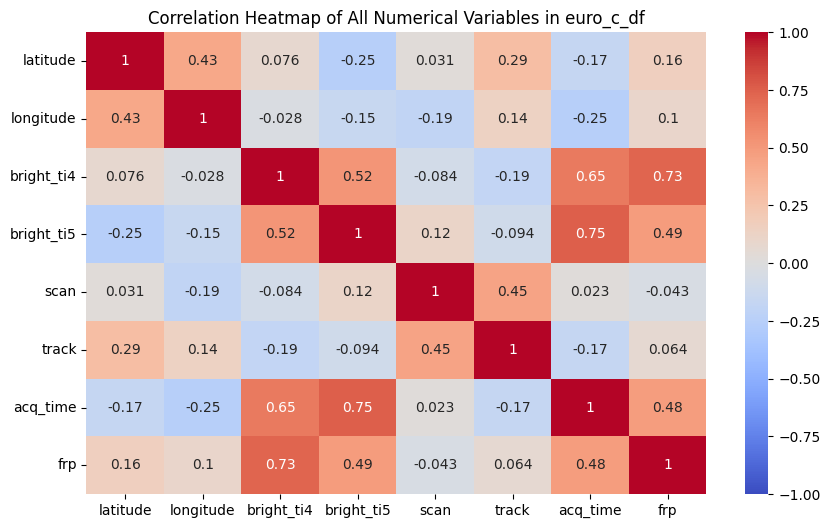

In [14]:
# select only numeric columns from euro_c_df_cleaned
numeric_df = euro_c_df_cleaned.select_dtypes(include=[float, int])

# calculate the correlation matrix
corr_matrix = numeric_df.corr()

# plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Numerical Variables in euro_c_df")
plt.show()


### Visual 2:

Question: Are wildfires more common during certain times of the year? Can we predict wildfire location and severity based on the time of year?

This visual shows how often wildfires occurred each day over the last 10 days across mainland Europe. Looking at daily counts can help us spot any short-term trends or spikes in wildfire activity. If we expanded this to cover a whole year, we might start to see seasonal patterns, which could be useful for predicting when and where wildfires are likely to happen based on the time of year.

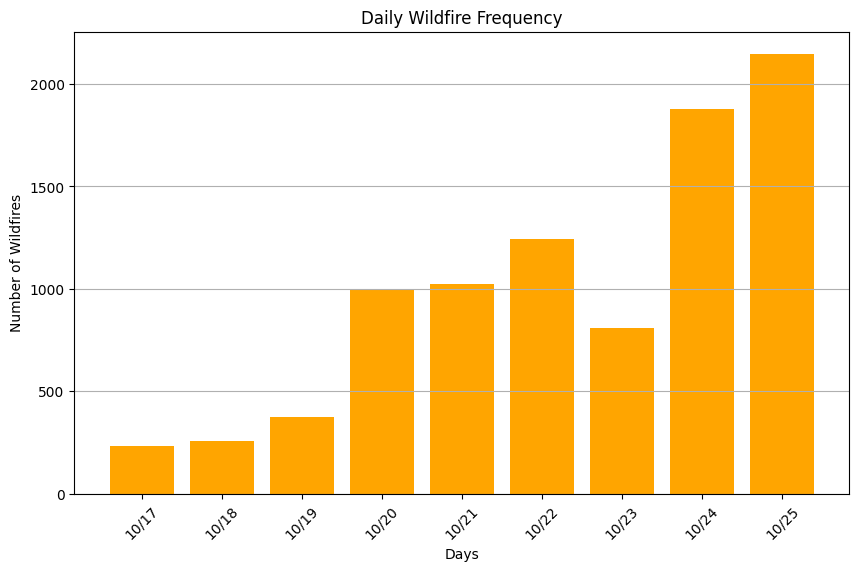

In [8]:
# last 10 days of all of mainland Europe (based on bounding region coordinates 36,-10,40,71)
area_url = f'https://firms.modaps.eosdis.nasa.gov/api/area/csv/{key}/VIIRS_NOAA20_NRT/36,-10,40,71/10'
df_area = pd.read_csv(area_url)

# acquisition date to datetime format
df_area['acq_date'] = pd.to_datetime(df_area['acq_date'])

# count occurrences per day
daily_fire_counts = df_area['acq_date'].value_counts().sort_index()

# bar chart of monthly wildfire frequency
plt.figure(figsize=(10, 6))
plt.bar(daily_fire_counts.index.strftime('%m/%d'), daily_fire_counts.values, color='orange')
plt.title('Daily Wildfire Frequency')
plt.xlabel('Days')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()